In [ ]:
#import necessary libraries
from google.cloud import bigquery as bq
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap
#client connection
c = bq.Client.from_service_account_json("/content/gokturkdede.json")
query = """ SELECT * FROM `name.Analytics.dataset_install` LIMIT 800000
"""
query2 = """ SELECT * FROM `name.Analytics.dataset_session` LIMIT 800000
"""
query3 = """ SELECT * FROM `name.Analytics.dataset_revenue` LIMIT 800000
"""
query4 = """ SELECT * FROM `name.Analytics.dataset_cost` LIMIT 800000
"""
query5 = """ SELECT * FROM `name.Analytics.dataset_coin_spend` LIMIT 800000
"""
query6 = """ SELECT * FROM `name.Analytics.dataset_level_start` LIMIT 800000
"""
query7 = """ SELECT * FROM `name.Analytics.dataset_level_end` LIMIT 800000
"""
#query results to dataframe
dataset_install_df= c.query(query).to_dataframe()
dataset_session_df = c.query(query2).to_dataframe()
dataset_revenue_df = c.query(query3).to_dataframe()
dataset_cost_df = c.query(query4).to_dataframe()
dataset_coin_spend_df = c.query(query5).to_dataframe()
dataset_level_start_df = c.query(query6).to_dataframe()
dataset_level_end_df = c.query(query7).to_dataframe()

**Daily Installs**

,number_of_user_install
date,
2021-04-30,1064
2021-05-01,9239
2021-05-02,8883
2021-05-03,6188
2021-05-04,6523


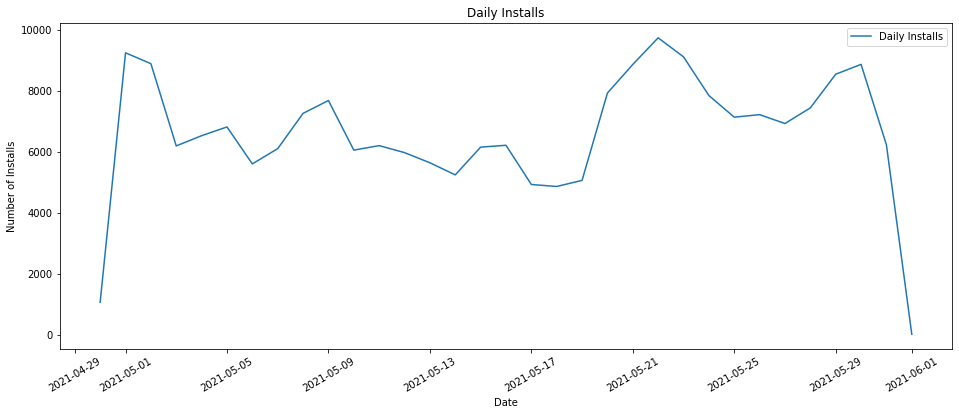

In [ ]:
##Daily Installs
dailyuseri=dataset_install_df
dailyuseri['date']=dailyuseri['event_time'].dt.date
dailyuseri = dailyuseri.groupby(['date']).agg(number_of_user_install=('user_id', 'count'))
display(dailyuseri.head(5))
plt.subplots(figsize=(16,6))
plt.plot(dailyuseri.index,dailyuseri['number_of_user_install'])
plt.title('Daily Installs')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend(['Daily Installs'])
plt.tick_params(axis='x', labelrotation=30)
plt.show()

**Number of Installs over Different Countries by Networks**

number_of_user_install
country network                        
Mercury Buzz                      33363
        Jessie                     1956
        Organic                   25568
        Sid                        3085
        Woody                     23226

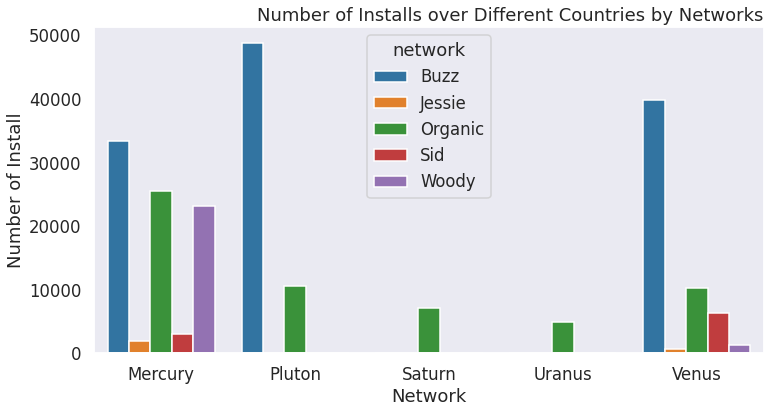

In [ ]:
dailyuseri3=dataset_install_df
dailyuseri3 = dailyuseri3.groupby(['country','network']).agg(number_of_user_install=('user_id', 'count'))
display(dailyuseri3.head(5))
x2_grouped_reset = dailyuseri3.reset_index()
plt.figure(figsize=(12, 6))
sns.set_style('dark')
sns.set_context('talk')
axes = sns.barplot(x='country', y='number_of_user_install', hue='network', 
                   data=x2_grouped_reset)
axes.set_ylabel('Number of Install')
axes.set_xlabel('Network')
plt.title('Number of Installs over Different Countries by Networks',
              loc='right')

plt.show()

**Number of Installs over Date by Networks**

number_of_user_install
date       network                        
2021-04-30 Buzz                        655
           Jessie                       31
           Organic                     203

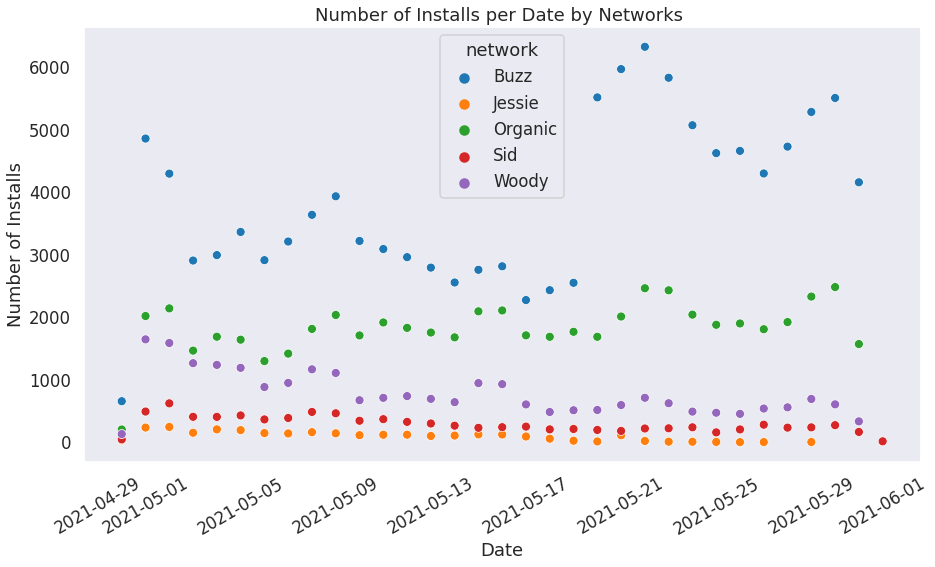

In [ ]:
dailyuseri2=dataset_install_df
dailyuseri2 = dailyuseri2.groupby(['date','network']).agg(number_of_user_install=('user_id', 'count'))
display(dailyuseri2.head(3))
x2_grouped_reset = dailyuseri2.reset_index()
plt.figure(figsize=(15, 8))
sns.scatterplot(x='date', y='number_of_user_install', data=x2_grouped_reset,
                 
                hue='network')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.title('Number of Installs per Date by Networks ')
plt.tick_params(axis='x', labelrotation=30)
plt.show()



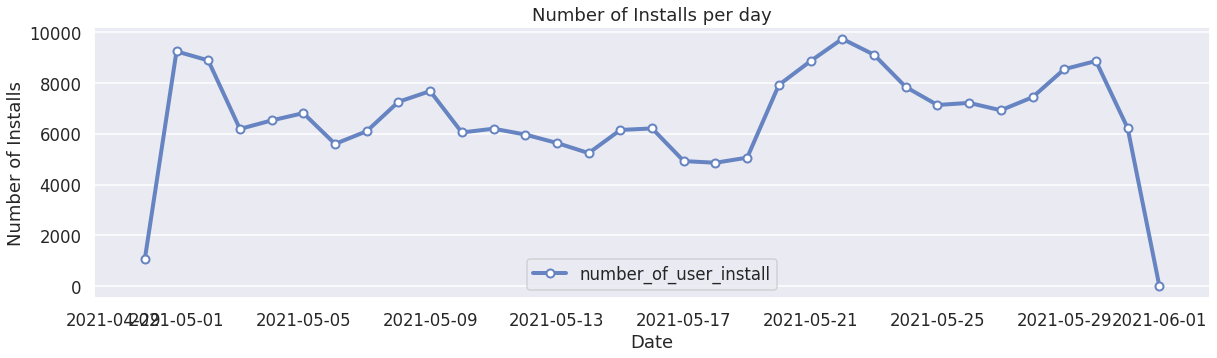

In [ ]:
dailyuseri['date_']=dailyuseri.index
chart_title = 'Number of Installs per day'
dataset=dailyuseri[['date_','number_of_user_install']]
ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.set_ylabel('Number of Installs')
ax.set_xlabel('Date')
ax.set_title(chart_title)

plt.show()

**Daily & Monthly Active User**

In [ ]:
dataset_session_df_copy=dataset_session_df
dataset_session_df_copy['date']=dataset_session_df_copy['event_time'].dt.date
def setup_active_user_df(df):
    active_user_df = pd.DataFrame({"date": pd.date_range(dataset_session_df_copy['date'].min(), dataset_session_df_copy['date'].max())})
    return active_user_df
def active_users_in_period(active_user_df, event_df, col_name, period):
    active_user_df[col_name] = 0   # Creates the empty column to be filled in
    for i in range(len(active_user_df)):
        origin_date = active_user_df['date'][i]
        offset_date = origin_date - pd.offsets.Day(int(period))
        # filter the original dataframe and count unique visitors
        count = len(event_df.loc[
                                (event_df['date'] <= origin_date) & 
                                (event_df['date'] > offset_date),
                                'user_id'].unique())
        active_user_df.loc[i, col_name] = count
    return active_user_df

active_user_df = setup_active_user_df(dataset_session_df_copy)
active_user_df = active_users_in_period(active_user_df, dataset_session_df_copy, 'DAU', 1)
active_user_df = active_users_in_period(active_user_df, dataset_session_df_copy, 'MAU', 30)


/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


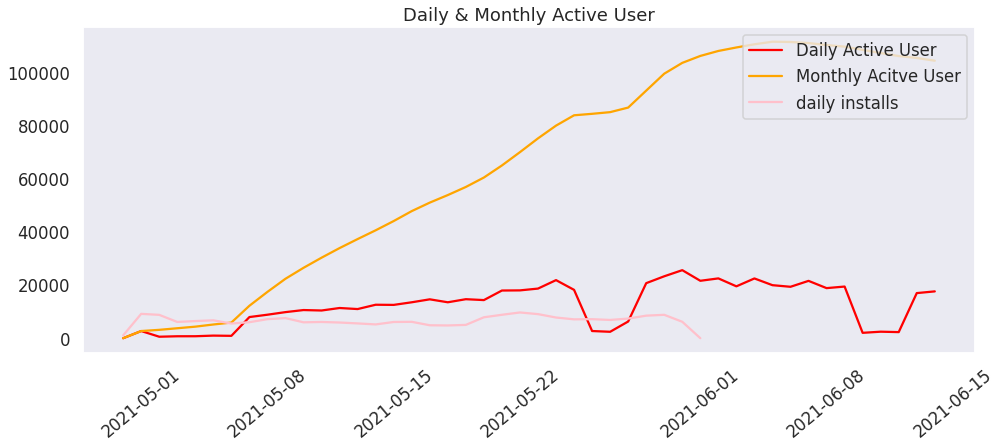

In [ ]:
dataset_install_df_copy=dataset_install_df
dataset_install_df_copy['date']=dataset_install_df_copy['event_time'].dt.date
install_df = dataset_install_df_copy.groupby(['date']).nunique()['user_id'].reset_index()
plt.subplots(figsize=(16,6))
plt.plot(active_user_df['date'], active_user_df['DAU'], 'red', active_user_df['date'], active_user_df['MAU'], 'orange', install_df['date'], install_df['user_id'], 'pink')
plt.legend(['Daily Active User', 'Monthly Acitve User', 'daily installs'], loc='upper right')
plt.title('Daily & Monthly Active User')
plt.xticks(rotation=40);

**Stickiness Rate**

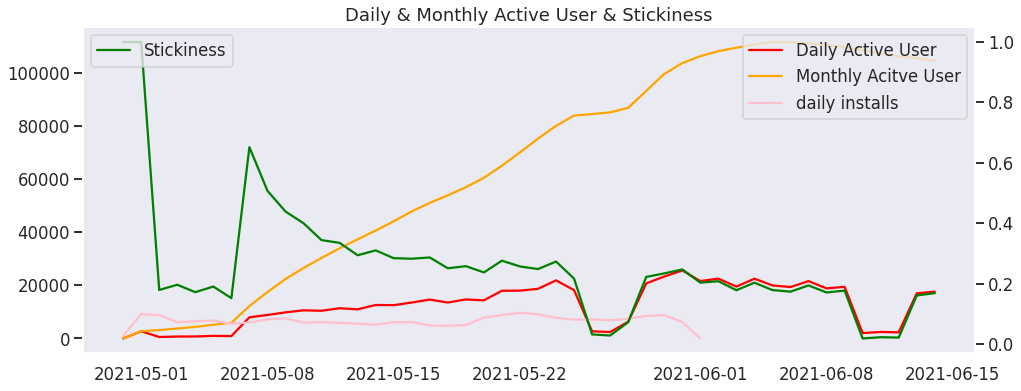

In [ ]:
active_user_df['stickness'] = active_user_df['DAU'] / active_user_df['MAU']
fig, ax = plt.subplots(figsize=(16,6))
ax2 = ax.twinx()
ax.plot(active_user_df['date'], active_user_df['DAU'], 'red', active_user_df['date'], active_user_df['MAU'], 'orange', install_df['date'], install_df['user_id'], 'pink')
ax2.plot(active_user_df['date'], active_user_df['stickness'], 'green')
ax.legend(['Daily Active User', 'Monthly Acitve User', 'daily installs'], loc='upper right')
ax2.legend(['Stickiness'], loc='upper left')
plt.title('Daily & Monthly Active User & Stickiness')
plt.xticks(rotation=40);

**Retention Rate**

Retention is stable for daily, weekly bases at %18 but it starts to decrease in monthly bases with %11.

0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   event_time   800000 non-null  datetime64[ns, UTC]
 1   user_id      800000 non-null  object             
 2   platform     800000 non-null  object             
 3   coin_status  800000 non-null  int64              
 4   time_spent   800000 non-null  int64              
 5   level        800000 non-null  int64              
 6   date         800000 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 42.7+ MB
None
0
                        event_time          user_id platform  coin_status  \
0 2021-06-05 00:13:49.462000+00:00  hft3152339786rm      ios         8329   
1 2021-06-03 22:08:56.377000+00:00  hft3154281521rm      ios         8538   
2 2021-06-08 00:33:15.667000+00:00  hft3153081297rm      ios         1092   
3

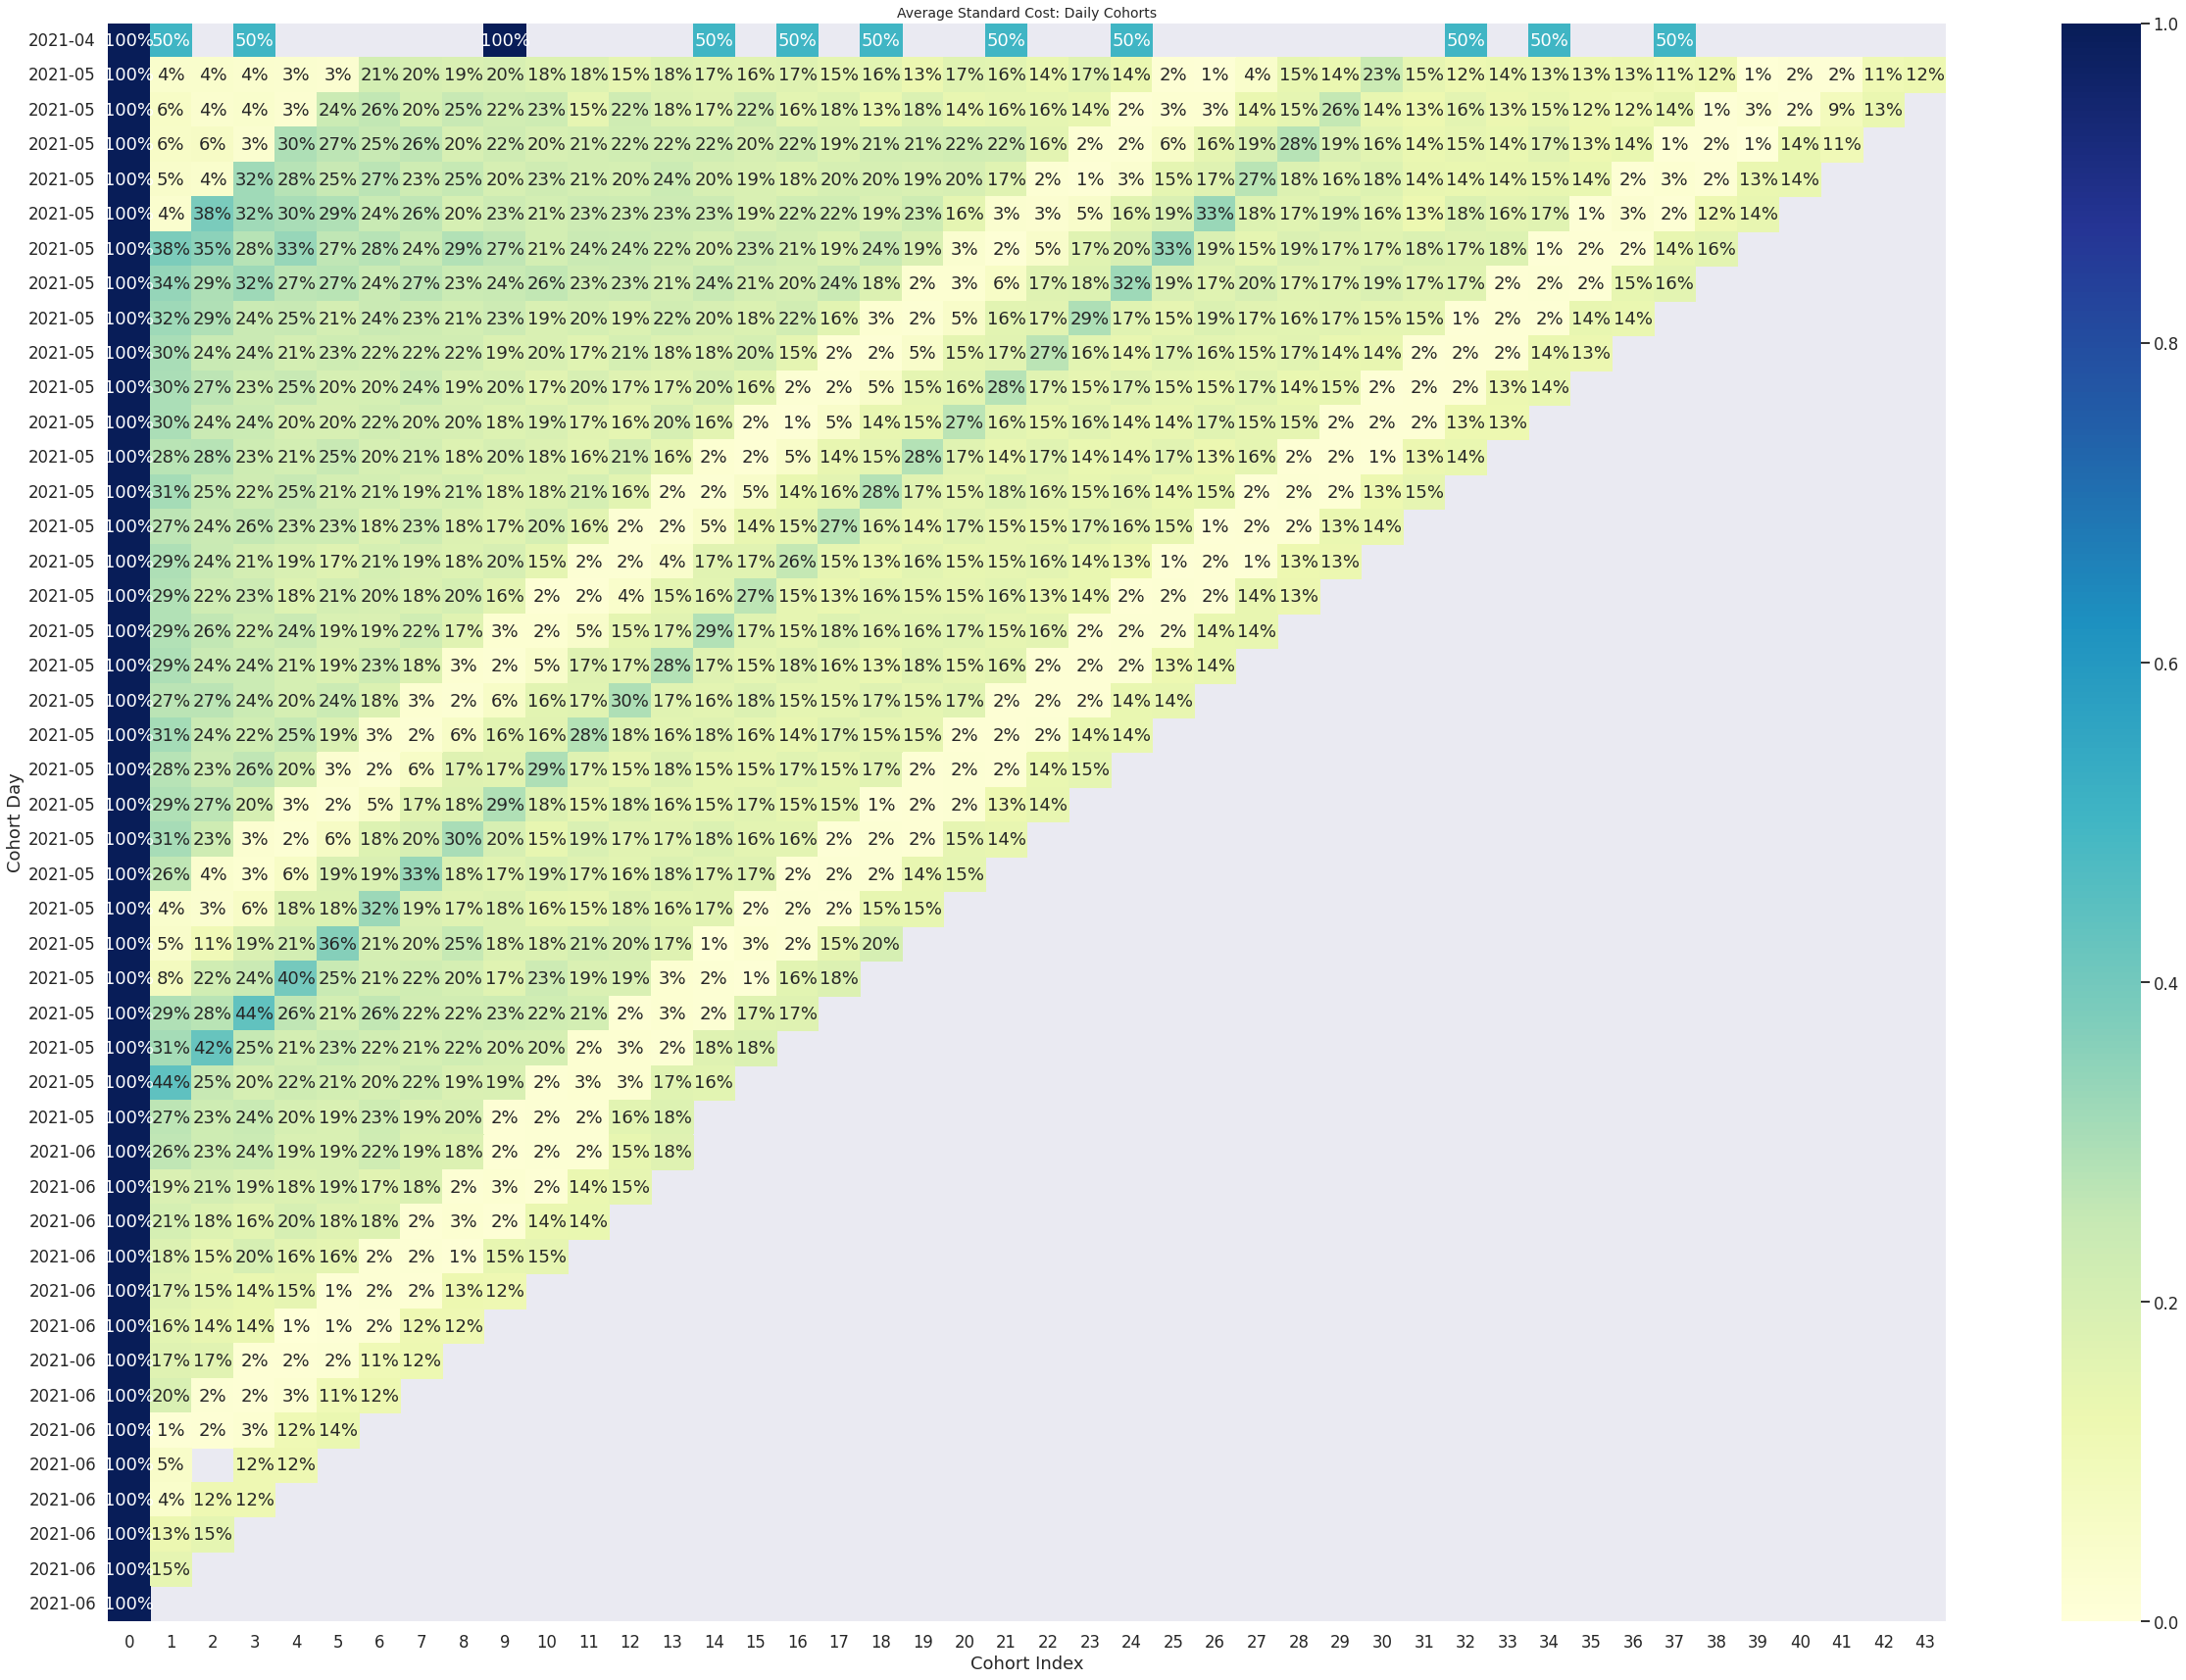

In [ ]:

##Retention Rate

transaction_df=dataset_session_df
print(transaction_df.isnull().values.sum())
transaction_df = transaction_df.replace(" ",np.NaN)
#transaction_df = transaction_df.fillna(transaction_df.mean())
print(transaction_df.isnull().values.sum())
print(transaction_df.info())
for col in transaction_df.columns:
    if transaction_df[col].dtypes == 'object':
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
print(transaction_df.isnull().values.sum())
def get_month(x): return dt.datetime(x.year, x.month, 1) 
transaction_df['TransactionMonth'] = transaction_df['event_time'].apply(get_month) 
transaction_df['TransactionDay'] = transaction_df.event_time.apply(lambda x: dt.datetime(x.year, x.month, x.day))
grouping = transaction_df.groupby('user_id')['TransactionMonth'] 
transaction_df['CohortMonth'] = grouping.transform('min')
transaction_df['CohortDay'] = transaction_df.groupby('user_id')['TransactionDay'].transform('min')
print(transaction_df.head())
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
transcation_year, transaction_month, transaction_day = get_date_int(transaction_df, 'TransactionDay')
cohort_year, cohort_month, cohort_day = get_date_int(transaction_df, 'CohortDay')
years_diff = transcation_year - cohort_year

months_diff = transaction_month - cohort_month

day_diff = transaction_day - cohort_day
transaction_df['CohortIndex'] = years_diff * 365 + months_diff * 30 + day_diff 
print(transaction_df.head(5))
grouping = transaction_df.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortDay',
                                 columns ='CohortIndex',
                                 values = 'user_id')
cohort_data.head()
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100
average_standard_cost=retention
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
plt.figure(figsize=(42, 30))
plt.title('Average Standard Cost: Daily Cohorts', fontsize = 14)
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =1,cmap="YlGnBu", fmt='.0%',)
plt.ylabel('Cohort Day')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [ ]:
retention
print('1-day retention {:.2%}\n3-day retention {:.2%}\n7-day retention {:.2%}\n30-day retention {:.2%}\n'.format(
    retention[2].mean(),retention[4].mean(), retention[8].mean(), retention[31].mean()))

1-day retention 19.87%
3-day retention 18.52%
7-day retention 17.38%
30-day retention 11.68%



**Conversion**

Conversion is %3 which need to be increased.

In [ ]:
revenue=dataset_revenue_df
install=dataset_install_df
install['dt']=install['event_time'].dt.date
revenue['dt']=revenue['event_time'].dt.date
revenue_first = revenue.sort_values(by=['dt', 'user_id']).drop_duplicates(subset='user_id', keep='first')
revenue_first['converted'] = 1
conversion = pd.merge(install[['user_id', 'dt']], revenue_first[['user_id', 'dt', 'converted']], 
            left_on='user_id', right_on='user_id', how='left').rename(columns={'dt_x':'install_dt', 'dt_y':'convert_dt'})
conversion.converted.fillna(0, inplace=True)


In [ ]:
conversion.converted.mean()

0.03808384886047421

**Time to purchase - TTP**

It seems that it tkaes around 8 days to purches for users.

In [ ]:
conversion.install_dt = pd.to_datetime(conversion.install_dt)
conversion.convert_dt = pd.to_datetime(conversion.convert_dt)
conversion['days_to_convert'] = conversion.convert_dt - conversion.install_dt

In [ ]:
conversion.days_to_convert.mean()

Timedelta('8 days 17:55:39.130434782')


**Average Revenue Per Install - RPI**



In [ ]:
revenue['revenue'] = revenue['revenue'].astype(float)
revenue.revenue.sum()/ install.user_id.nunique()


1.9226155605768962

**Average Cost Per Install - CPI**

Avarage cost per install is around two times higher than avarage pevenue per install which means that most of the users who install the game do not purches.

In [ ]:
dataset_cost_df.cost.sum()/ install.user_id.nunique()

4.42031876214653

**Revenue Over Package Types**

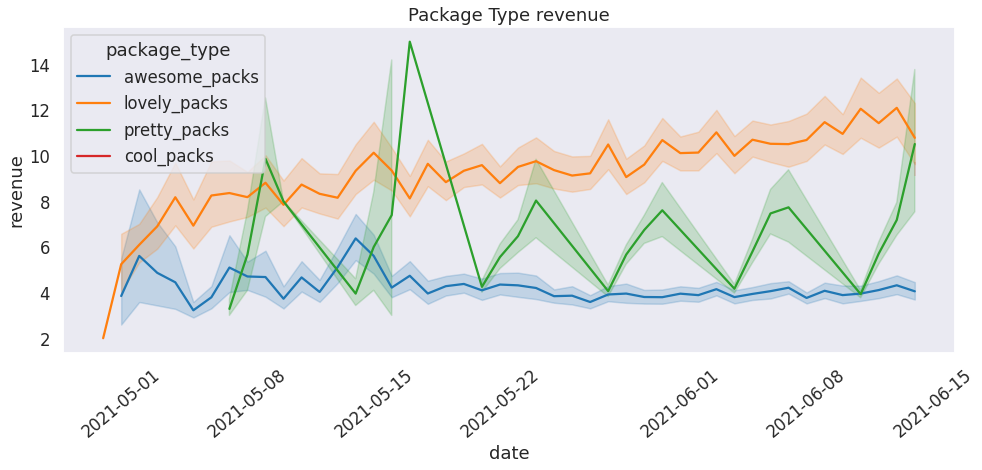

In [ ]:
rev_pac=dataset_revenue_df
plt.figure(figsize=(16,6))
sns.lineplot(data=rev_pac, x="date", y="revenue", hue="package_type")
plt.title('Package Type revenue')
plt.xticks(rotation=40);

**Revenue Over Platforms**

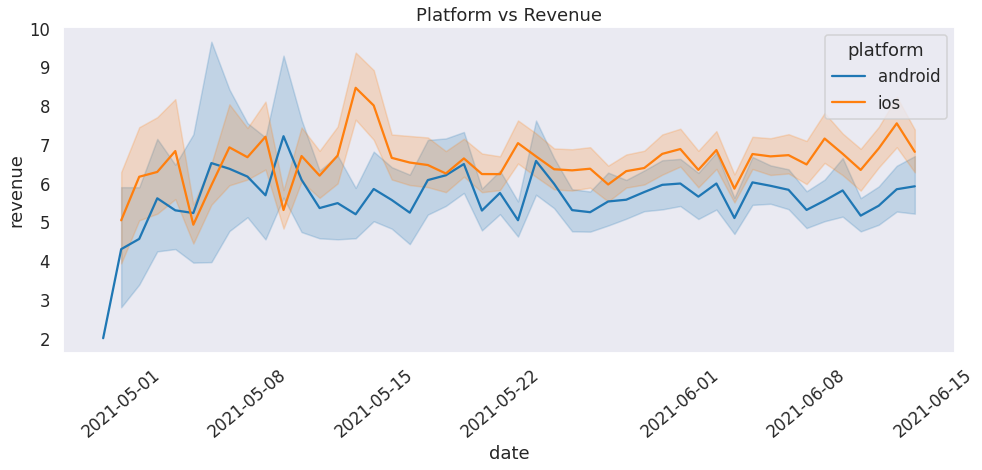

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=rev_pac, x="date", y="revenue", hue="platform")
plt.title('Platform vs Revenue')
plt.xticks(rotation=40);

**Average Revenue Per User by Date - ARPU**

,number_of_user,revenue_sum,ARPU
date,,,
2021-04-30,1,2.0,2.000000
2021-05-01,65,313.0,4.815385
2021-05-02,240,1418.0,5.908333
2021-05-03,304,1871.0,6.154605
2021-05-04,461,3003.0,6.514100


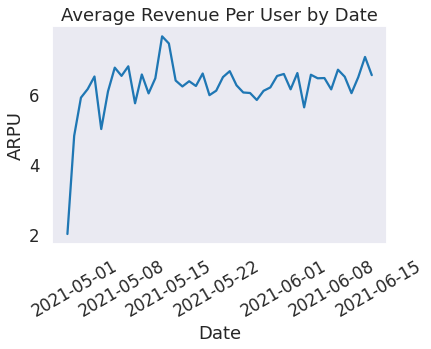

In [ ]:
Avarage_reve1=dataset_revenue_df
Avarage_reve1['revenue'] = Avarage_reve1['revenue'].astype(float, errors = 'raise')
Avarage_reve1['date']=Avarage_reve1['event_time'].dt.date
Avarage_reve = Avarage_reve1.groupby(['date']).agg(number_of_user=('user_id', 'count'),
                                                              revenue_sum=('revenue','sum'))
Avarage_reve['ARPU']=Avarage_reve['revenue_sum']/Avarage_reve['number_of_user']
display(Avarage_reve.head(5))

plt.plot(Avarage_reve.index,Avarage_reve['ARPU'])
plt.title('Average Revenue Per User by Date')
plt.xlabel('Date')
plt.ylabel('ARPU')
plt.tick_params(axis='x', labelrotation=30)
plt.show()

**Life Time Value - LTV**

In [ ]:
#LTV

Avarage_reve2 = Avarage_reve1.groupby(['user_id']).agg(LTV=('revenue','sum'))
display(Avarage_reve2.head(3))

,LTV
user_id,
hft3149978724rm,24.0
hft3150675758rm,78.0
hft3151627916rm,2.0


The graph below shows that revenue declined in the middle of the month and its roughly same for days of a week. There is not enough data for yearly and monthly outcome.

In [ ]:
temp_data=dataset_revenue_df
#Date Time Analysis
temp_data.loc[:, "Month"] = temp_data.event_time.dt.month
temp_data.loc[:, "Time"] = temp_data.event_time.dt.time
temp_data.loc[:, "Year"] = temp_data.event_time.dt.year
temp_data.loc[:, "Day"] = temp_data.event_time.dt.day
temp_data.loc[:, "Quarter"] = temp_data.event_time.dt.quarter
temp_data.loc[:, "Day of Week"] = temp_data.event_time.dt.dayofweek
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping) 
temp_data['revenue'] = temp_data['revenue'].astype(float, errors = 'raise')


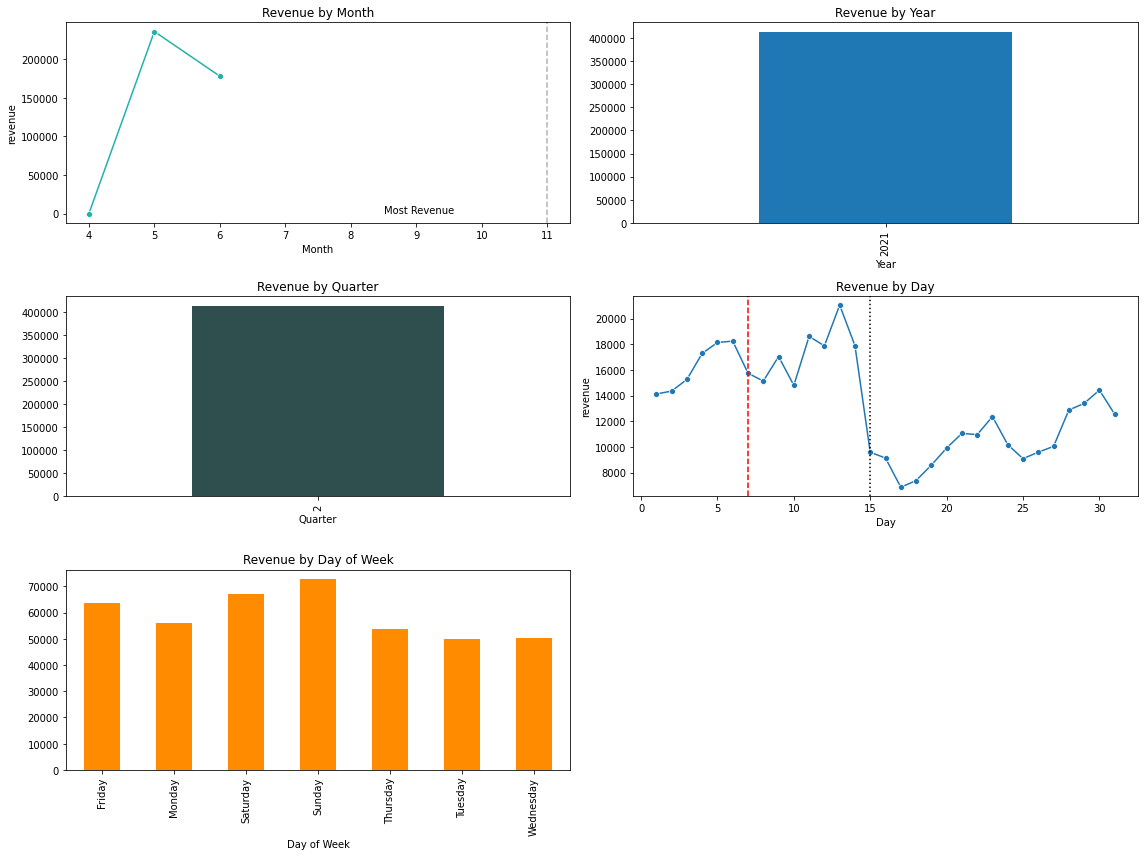

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "revenue", data = temp_data.groupby("Month").sum("revenue"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.0e2, "Most Revenue")
plt.title("Revenue by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["revenue"].plot(kind = "bar")
plt.title("Revenue by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["revenue"].plot(kind = "bar", color = "darkslategrey")
plt.title("Revenue by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "revenue", data = temp_data.groupby("Day").sum("revenue"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Revenue by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["revenue"].plot(kind = "bar", color = "darkorange")
plt.title("Revenue by Day of Week")
plt.tight_layout()
plt.show()

In [ ]:
import lifetimes
data=dataset_revenue_df
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "user_id", "event_time", "revenue")



/usr/local/lib/python3.7/dist-packages/lifetimes/utils.py:287: UserWarning: Converting to Period representation will drop timezone information.
  pd.to_datetime(transactions[datetime_col].max(), format=datetime_format).to_period(freq).to_timestamp()
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


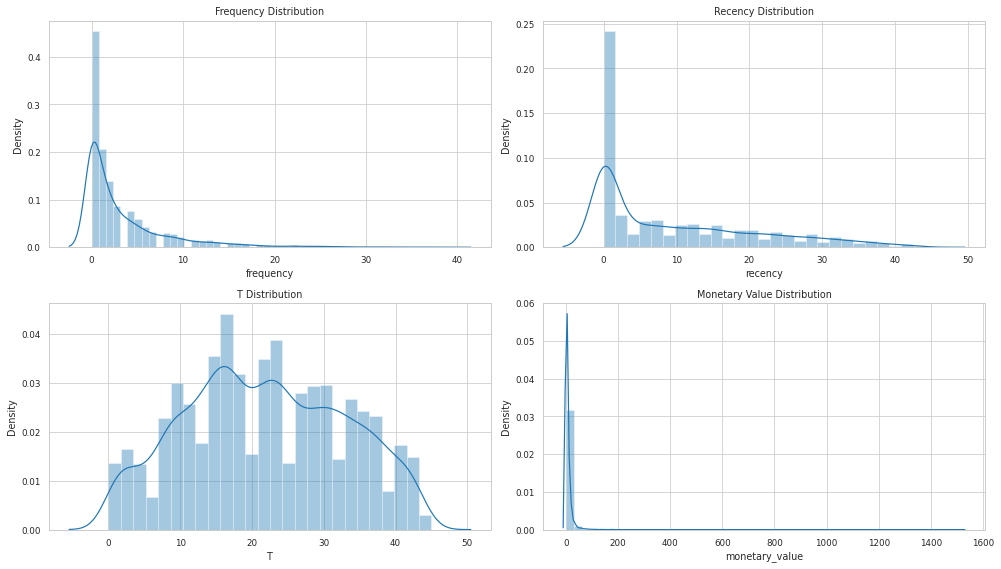

In [ ]:
rfm_summary.head()
rfm_summary.reset_index(inplace = True)
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

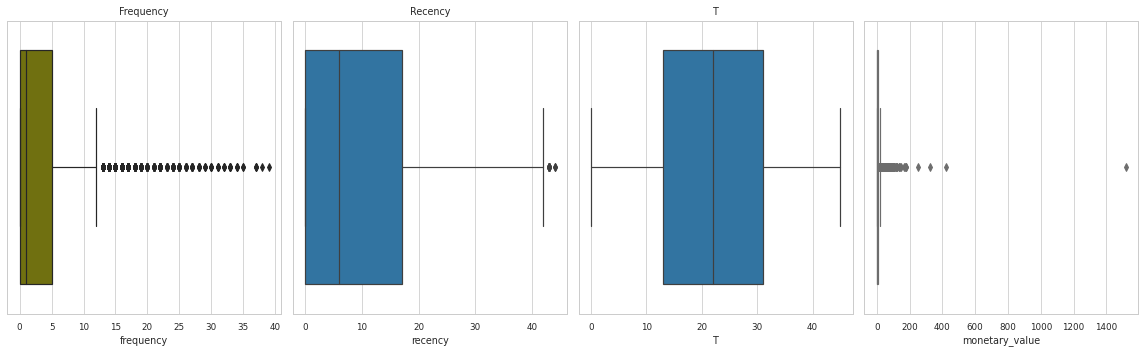

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [ ]:
rfm_summary

,user_id,frequency,recency,T,monetary_value
0,hft3149978724rm,2.0,8.0,16.0,10.000000
1,hft3150675758rm,6.0,12.0,15.0,12.666667
2,hft3151627916rm,0.0,0.0,25.0,0.000000
3,hft3152071656rm,3.0,6.0,26.0,3.000000
4,hft3152071664rm,2.0,7.0,12.0,2.000000
...,...,...,...,...,...
8125,hft3155140174rm,2.0,3.0,7.0,40.000000
8126,hft3155140547rm,2.0,2.0,14.0,36.000000
8127,hft3155141027rm,1.0,10.0,10.0,4.000000
8128,hft3155141802rm,4.0,11.0,13.0,12.500000


Now lets change "monetary" variable into "avg_monetary" by diveding "frequency" variable to calculate avarage monetary value per purches

In [ ]:
rfm_summary["monetary_value"] = rfm_summary["monetary_value"] / rfm_summary["frequency"]

rfm_summary.rename(columns={"monetary_value": "monetary_avg"}, inplace=True)

To calculate cltv we will use BGNBD Model and Gama Gama Model. In order to use this model we neet to change our "Recency" and "T"(Customer Age) variables into weeks

In [ ]:
rfm_summary["recency_weekly_cltv_p"] = rfm_summary["recency"] / 7
rfm_summary["T_weekly"] = rfm_summary["T"] / 7

In [ ]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(rfm_summary['frequency'],
        rfm_summary['recency_weekly_cltv_p'],
        rfm_summary['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 8130 subjects, a: 0.13, alpha: 0.45, b: 0.84, r: 0.62>

With this model we are able to calculate expected purchases of every single customer in the data set.

Also if we sum up all these purchases we can get the expected revenue of the company

In [ ]:
# exp_sales_1_month
rfm_summary["exp_sales_1_month"] = bgf.predict(4, # <= The time period can be changed here (remember that our time period is in weeks)
                                       rfm_summary['frequency'],
                                       rfm_summary['recency_weekly_cltv_p'],
                                       rfm_summary['T_weekly'])
# exp_sales_3_month
rfm_summary["exp_sales_3_month"] = bgf.predict(12, # <= The time period can be changed here
                                       rfm_summary['frequency'],
                                       rfm_summary['recency_weekly_cltv_p'],
                                       rfm_summary['T_weekly'])
#Note: Here we are not calculating how much money will be spent. We are calculating how many purcheses one customer is likely to make

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Average Purches Value**

In this part, It can be seen that cost is almost same day by day but total cost per pusches seem to decline which indicate that purches amount is increasing even there is not extra budget that is spent for game.

In [ ]:
##Average Purches Value
datar=dataset_cost_df
Avarage_reve['date1']=Avarage_reve.index
datar['cost'] = datar['cost'].astype(float, errors = 'raise')
#datar['date']=datar['date'].dt.date
datar = datar.groupby(['date']).agg(total_cost=('cost', 'sum'))
datar['date1']=datar.index
datar = pd.merge(datar,Avarage_reve,on='date1')
datar['total cost per purches']=datar['total_cost']/datar['number_of_user']

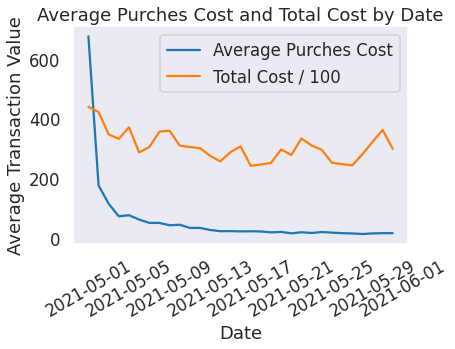

<Figure size 720x360 with 0 Axes>

In [ ]:

plt.plot(datar.date1, datar['total cost per purches'], label = "Average Purches Cost")
plt.plot(datar.date1, datar['total_cost']/100, label = "Total Cost / 100")
plt.title('Average Purches Cost and Total Cost by Date')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.tick_params(axis='x', labelrotation=30)
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.set_context('paper')


**LEVEL ANALYSIS**

In [ ]:
dataset=dataset_level_end_df
identity = dataset["level"]
dataset= pd.get_dummies(dataset["status"])
dataset = pd.concat([dataset, identity], axis = 1)
freight_pd4 = dataset.groupby(['level']).agg(number_of_win=('win', 'sum'),
                                             number_of_quit=('quit', 'sum'),
                                             number_of_fail=('fail', 'sum'))
freight_pd4['number_of_attemp']=freight_pd4['number_of_win']+freight_pd4['number_of_fail']+freight_pd4['number_of_quit']
freight_pd4['level']=freight_pd4.index
freight_pd4['win_rate']=freight_pd4['number_of_win']/freight_pd4['number_of_attemp']

**Win Rate vs Level**

In this part, it can be seen that some levels has higher win rate than others. Avarage win rate is just below %40. On the other hand, some levels has significantly high win rate which are marked with red stars. There might be problems about these levels.

NOT: In order to get more accurate statistic, levels used which has attemp amount higher than 30. 

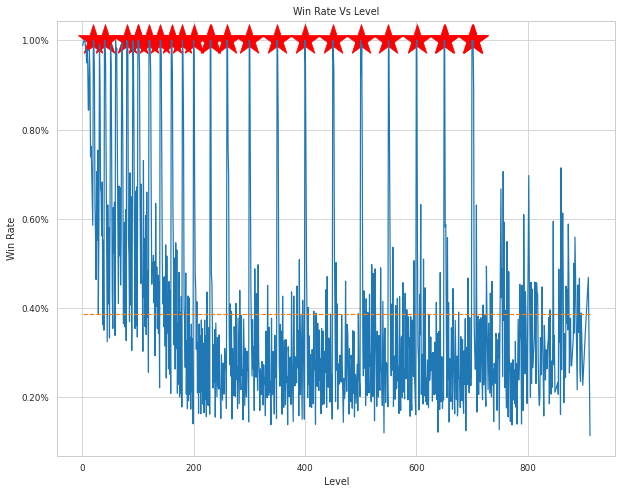

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
dataset = freight_pd4[freight_pd4['number_of_attemp'] >= 30]
q = dataset["win_rate"].quantile(0.99)
mean_y = [np.mean(dataset['win_rate'])]*len(dataset)
dataset2 = dataset[dataset['win_rate'] >= q  ]
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
plt.plot( dataset["level"],dataset['win_rate'])
plt.scatter(dataset2["level"], dataset2['win_rate'] , marker='*', color='red', s=1e3) 
ax.plot(dataset["level"],mean_y, label='Mean', linestyle='--')

plt.title('Win Rate Vs Level')
plt.xlabel('Level')
plt.ylabel('Win Rate')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(100))
plt.show()

**Difficulty Vs Level**

In this part, difficulty of the level is explored. In order to find the difficulty, some metrics are used such as win rate, total time spent at level, number of moves left at level. 

It seems that level difficulty is increasing by level although, there are some levels that do not follow the trend.

In [ ]:
dataset5=dataset_level_end_df

freight_pd5 = dataset5.groupby(['level']).agg(total_time_spent_at_level=('time_spent', 'sum'),
                                              total_moves_left=('moves_left', 'sum'))
freight_pd5 = (freight_pd5-freight_pd5.min())/(freight_pd5.max()-freight_pd5.min())
freight_pd5 = pd.concat((freight_pd5, freight_pd4.win_rate), 1)
freight_pd5 = pd.concat((freight_pd5, freight_pd4.number_of_attemp), 1)
freight_pd5=freight_pd5[(freight_pd5['win_rate'] > 0) ]
freight_pd5['level']=freight_pd5.index
freight_pd5=freight_pd5[(freight_pd5['win_rate'] < 1) ]
freight_pd5['total_time_spent_at_level']=(freight_pd5['total_time_spent_at_level']/freight_pd5['number_of_attemp'])*100
freight_pd5['difficulty_of_the _level']=freight_pd5['total_time_spent_at_level']/(freight_pd5['total_moves_left']*freight_pd5['win_rate'])
q2 = freight_pd5["difficulty_of_the _level"].quantile(0.95)

freight_pd5=freight_pd5[(freight_pd5['difficulty_of_the _level'] <= 200) ]
freight_pd5=freight_pd5[(freight_pd5['number_of_attemp'] >= 20) ]



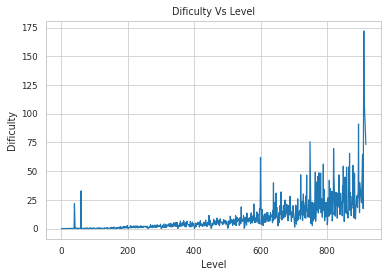

In [ ]:
plt.plot( freight_pd5['level'],freight_pd5['difficulty_of_the _level'])


plt.title('Dificulty Vs Level')
plt.xlabel('Level')
plt.ylabel('Dificulty')

plt.show()

Levels listed below are taken from the graph below as a outlier.

level 40

level 60

level 600

level 749

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=freight_pd5['level'],
    y=freight_pd5['difficulty_of_the _level'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Dificulty",
))



fig.update_layout(title="Dificulty Vs Level",
                  xaxis_title="Level",
                  yaxis_title="Dificulty")

fig.show()

**Quit Rate Vs Level**

In this part, quit rate is taken out from data. Levels such as 70 and 580 has high percentage of quit rate which sould be considered.

In [ ]:
freight_pd6=freight_pd4
freight_pd6['quit_rate']=freight_pd6['number_of_quit']/freight_pd6['number_of_attemp']
a=freight_pd6['quit_rate'].mean()
freight_pd6=freight_pd6[(freight_pd6['quit_rate'] >= a) ]
freight_pd6=freight_pd6[(freight_pd6['number_of_attemp'] >= 20) ]



In [ ]:

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=freight_pd6['level'],
    y=freight_pd6['quit_rate'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="quit_rate",
))



fig.update_layout(title="Quit Rate Vs Level",
                  xaxis_title="Level",
                  yaxis_title="Quit Rate")

fig.show()

**Avarege time spent Vs Level**

In this part, avarage time spent at each level is calculated.

In [ ]:
yeni_oyna=dataset_coin_spend_df

identity = yeni_oyna["level"]
yeni_oyna= pd.get_dummies(yeni_oyna["spending_type"])

yeni_oyna = pd.concat([yeni_oyna, identity], axis = 1)
freight_pd7 = yeni_oyna.groupby(['level']).agg(number_of_level_spend=('level_spend', 'sum'))
freight_pd7['level']=freight_pd7.index

freight_pd7 = pd.concat((freight_pd7, freight_pd4.number_of_attemp), 1)
freight_pd7=freight_pd7.dropna()
freight_pd7['number_of_spent_type_per_atm']=freight_pd7['number_of_level_spend']/freight_pd7['number_of_attemp']
freight_pd7=freight_pd7[(freight_pd7['number_of_attemp'] >= 20) ]


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=freight_pd7['level'],
    y=freight_pd7['number_of_spent_type_per_atm'],
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="number_of_spent_type_per_atm",
))



fig.update_layout(title="Avarege time spent Vs Level",
                  xaxis_title="Level",
                  yaxis_title="number_of_spent_type_per_atm")

fig.show()

**Time Spent per User Vs Level**

In this part avarage time spent per user is examined.

,number_of_time_spent,number_of_user,time_spent_per_user,level
level,,,,
1,12398,658,18.841945,1
2,43388,1515,28.638944,2
3,34925,1224,28.533497,3
4,31796,1102,28.852995,4
5,39514,1379,28.654097,5


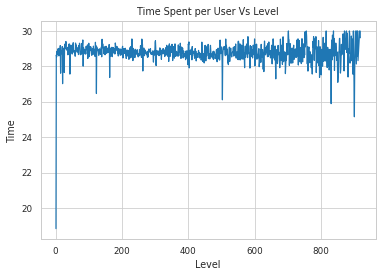

In [ ]:
oynadevam=dataset_session_df
oynadevam2=dataset_session_df

oynadevam = oynadevam.groupby(['level']).agg(number_of_time_spent=('time_spent', 'sum'),
                                             number_of_user=('user_id', 'count'))

oynadevam['time_spent_per_user']=oynadevam['number_of_time_spent']/oynadevam['number_of_user']
oynadevam['level']=oynadevam.index

oynadevam=oynadevam[(oynadevam['number_of_user'] >= 20) ]

display(oynadevam.head(5))
plt.plot( oynadevam['level'],oynadevam['time_spent_per_user'])


plt.title('Time Spent per User Vs Level')
plt.xlabel('Level')
plt.ylabel('Time')

plt.show()


**Avarege Time Spent per User per Move Vs Level**

In [ ]:
deneme=dataset_level_end_df
deneme['total_move']=deneme['moves_made']+deneme['moves_left']
deneme = deneme.groupby(['level']).agg(totalmove=('total_move', 'mean'))

freight_pd8 = pd.concat((oynadevam, deneme.totalmove), 1)
freight_pd8=freight_pd8.dropna()
freight_pd8['totalmove_per_user_per_move']=freight_pd8['time_spent_per_user']/freight_pd8['totalmove']
freight_pd8['level']=freight_pd8.index


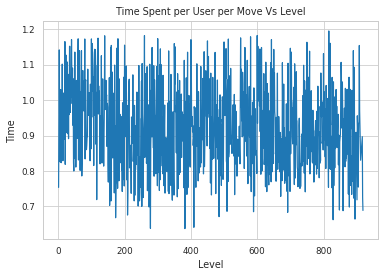

In [ ]:
plt.plot( freight_pd8['level'],freight_pd8['totalmove_per_user_per_move'])


plt.title('Time Spent per User per Move Vs Level')
plt.xlabel('Level')
plt.ylabel('Time')

plt.show()